In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io.wavfile
%matplotlib notebook

In [3]:
train_labels = pd.read_csv('./train_curated.csv')

In [4]:
train_labels.head()

,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping


In [6]:
train_labels['labels'].describe()

count     4970
unique     213
top       Gong
freq        75
Name: labels, dtype: object

In [11]:
train_labels['categories'] = pd.Categorical(train_labels['labels'])

train_labels.head()

,fname,labels,categories
0,0006ae4e.wav,Bark,Bark
1,0019ef41.wav,Raindrop,Raindrop
2,001ec0ad.wav,Finger_snapping,Finger_snapping
3,0026c7cb.wav,Run,Run
4,0026f116.wav,Finger_snapping,Finger_snapping


In [16]:
train_labels['categories'] = train_labels['categories'].cat.codes

<IPython.core.display.Javascript object>


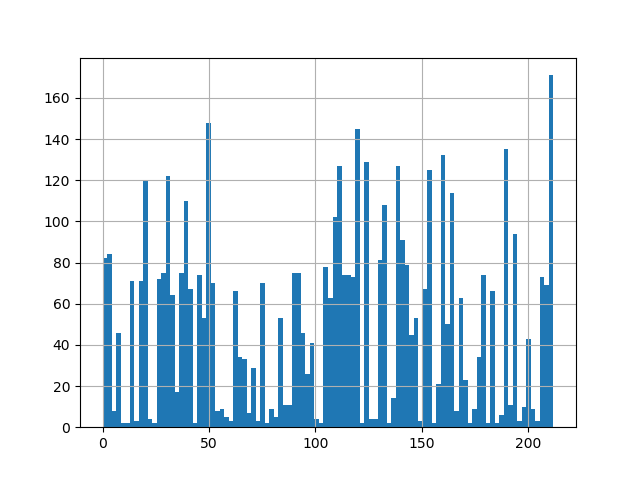

In [22]:
train_labels['categories'].hist(bins=100)

In [27]:
from scipy import signal, io

In [31]:
labels_per_cat = [g[1]['fname'] for g in train_labels.groupby('categories')]

In [37]:
train_files_per_category = [files[:int(0.8 * len(files))] for files in labels_per_cat]

In [ ]:
periodograms = []

for category in train_files_per_category:
    realizations = []
    for f_name in category:
        Fs, realization = scipy.io.wavfile.read('./train_curated/{}'.format(f_name))
        realizations += [realization]
    if len(realizations) > 0:
        realizations = np.concatenate(realizations)
        f, Pxx = scipy.signal.welch(realizations, fs=Fs)
        periodograms += [Pxx]
    else:
        periodograms += [np.zeros(129)]

array([ -26,  -33,  -31, ..., 2703, 2835, 2502], dtype=int16)